In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from sklearn.cluster import KMeans
from tqdm import tqdm
from glob import glob

(100, 100, 3)


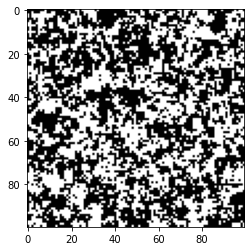

In [2]:
path_img = "/Users/burakcivitcioglu/Documents/ising_data_interpolate_test/"
img_path = glob(path_img + "*/*.png")[0]
img = np.array(Image.open(img_path).convert('RGB'))
print(img.shape)
plt.imshow(img)

In [3]:
k = 1
kmeans = KMeans(n_clusters=k).fit(img.reshape(-1,3))
centers = np.array(kmeans.cluster_centers_,dtype='uint8')
print(centers)

[[123 123 123]]


(10000, 3)


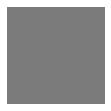

[array([123, 123, 123], dtype=uint8)]


In [4]:
new_img = np.zeros((100*100,3),dtype='uint8')
print(new_img.shape)

i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()
print(colors)

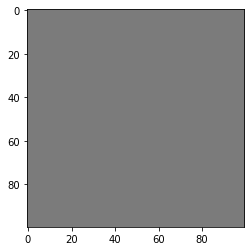

In [5]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()

In [6]:
img = np.where(img==255,-1,img)

In [7]:
new_img=np.where(new_img==0,1,-1)

In [8]:
np.any(img!=new_img)

True